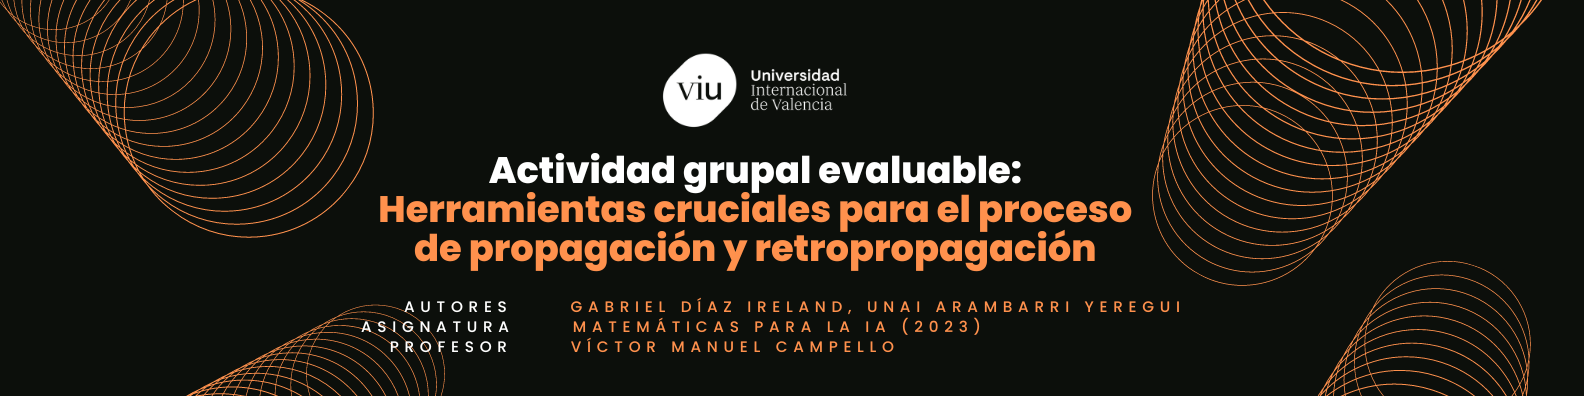

## **02MIAR Matemáticas aplicada a la IA - Grupo 23**
***
## **Ejercicio 1 - Métodos de cálculo de determinantes.**
***
<br><br><br>
##### **(1. a) Implementa una función, determinante recursivo, que obtenga el determinante de una matriz cuadrada utilizando la definición recursiva de Laplace.**<br>

***

Usando las fórmulas proporcionadas en clase para el determinante recursivo de Laplace (método de desarollo/expansión por cofactores) vamos a definir las distintas partes de la función que nos permitirá calcular el determinante de Laplace.
<div style="text-align: center;">
Teorema de Laplace:
</div>

$$\text{det}(A) = \sum_{j=1}^{n} (-1)^{i+j} \cdot a_{ij} \cdot \text{det}(A_{ij})$$

- i = Fila 
- j = Columna 
- $(-1)^{i+j}$ = Exponente que irá alternando su valor de negativo a positivo a medida que navegue por la fila.
- $a_{ij}$ = Coeficiente  
- $\text{det}(A_{ij})$ = Submatriz, obtenido de eliminar la fila i y columna j de la iteración correspondiente.

<br>
<br>
    
**Un ejemplo fácil y descriptivo de aplicación y utilidad de el determinante recursivo de Laplace:**

Imaginemos que tenemos las siguientes ecuaciones.

2x+3y = 8   Ecuación 1. Método 1 para aumentar ingresos
<br>
4x−2y = 2   Ecuación 2. Método 2 para aumentar ingresos
​

Si aplicamos las metodologías de Laplace descritas anteriormente, obtendremos que el determinante es -16. Este número nos podría indicar que entre las ecuaciones, las variables se comportan de manera inversa. 

Es cierto, que este ejemplo es muy general y que en la realidad, esto require de un estudio más complejo y definir bien cuales son las ecuaciones, pero es una forma fácil y útil de ver la aplicación de Laplace. Cuando el determinante sea cero, querrá decir que ambas ecuaciones son linealmente dependientes.
​
<br><br>

**- Función Laplace. -**

In [1]:
import numpy as np

def determinante_recursivo(matriz):

 
    if len(matriz) == 2 and len(matriz[0]) == 2:    # Miramos que la matriz sea 2x2
        Det_Laplace = matriz[0][0] * matriz[1][1] - matriz[0][1] * matriz[1][0]

        return Det_Laplace
    
    else:
        Det_Laplace = 0
    matriz = np.array(matriz, dtype=np.float64)
    for j in range(len(matriz[0,:])):
        
        cofactor = (-1) ** (1 + j)
        submatriz = []

        ###Iteramos range(1, len(matriz)). Esto nos permite sacar la sub_matriz en el for loop sin pasar nunca por la fila 1 (Que es de la que obtenemos los valores más adelante de matriz[0][j])
        for i in range(1, len(matriz)):  
            row = np.concatenate((matriz[i, 0:j], matriz[i, j+1:])) ###Se itera para cada fila y columna. La expresión -> matriz[i][0:j]   se asegura de recoger todos los elementos hasta j Y La expresión -> matriz[i][j+1:]  se asegura de terminar de recoger todos los elementos si es posible después de j.
            submatriz.append(row)  ###Con la variable row conseguimos cada fila de nuestra submatriz
        Det_Laplace += cofactor * matriz[0][j] * determinante_recursivo(submatriz) ###Repite una por una esta operación hasta que la submatriz sea de tamaño 2. En ese momento, se aplica la primera parte del código al ser el rango (2x2) -> Det_Laplace = matriz[0][0] * matriz[1][1] - matriz[0][1] * matriz[1][0] y no se vuelve a llamar el else: que contiene la llamada de la propia función.
 
    return Det_Laplace

**Pruebas respectivas para ver que la función está bien desarrollada**

In [2]:
# Ejemplo con una matriz 3x3
matriz = [[2, -1,5], [0, 1,4], [0, 1,8]] 
det = determinante_recursivo(matriz)
print("Resultado de la prueba. Determinante:", det)

Resultado de la prueba. Determinante: -8.0


<br><br><br>
##### (**1 - b) Si A es una matriz cuadrada n×n y triangular (superior o inferior, es decir,con entradas nulas por debajo o por encima de la diagonal, respectivamente), ¿existe alguna forma de calcular de forma directa y sencilla su determinante? Justifique la respuesta.**
***

A partir de los apuntes en el Tema 1 (La parte de complejidad computacional, ejercicio de matrices triangulares) revisamos un ejemplo sobre la matriz triangular. Efectivamente vemos que es la que está compuesta por solo ceros o bien por encima de la diagonal o bien por debajo de la diagonal.

Si aplicamos el teorema de Laplace (Ejercicio 1-a)  obtenemos la siguiente relación.



\begin{bmatrix}
3 & 0 & 0 & 0 \\
1 & 5 & 0 & 0 \\
2 & 6 & 4 & 0 \\
7 & 9 & 8 & 2 \\
\end{bmatrix}




\begin{align*}
Paso_1 &\rightarrow \text{Determinante} = 3 \cdot M_{11} - 0 \cdot M_{12} + 0 \cdot M_{13} - 0 \cdot M_{14} &&\text{Comentario1: Los coeficientes con valor 0 anulan sus respectivas submatrices.}\\
Paso_2 &\rightarrow \text{Determinante} = 3 \cdot \begin{vmatrix} 5 & 0 & 0 \\ 6 & 4 & 0 \\ 9 & 8 & 2 \end{vmatrix}\\
Paso_3 &\rightarrow \text{Determinante} = 3 \cdot (5 \cdot M_{21} - 0 \cdot M_{22} + 0 \cdot M_{23}) &&\text{Comentario1: Los coeficientes con valor 0 VUELVEN a anular sus respectivas submatrices.} \\
Paso_4 &\rightarrow \text{Determinante} = 3 \cdot 5 \cdot \begin{vmatrix} 4 & 0 \\ 8 & 2 \end{vmatrix} \\
\end{align*}

**- Estudio del comportamiento observado en la matriz de Laplace -**

1 - Al aplicar el teorema, se nos va la primera fila y la primera columna y queda el número 3 como coeficiente multiplicando la submatriz. 

$3 \cdot \begin{vmatrix} 5 & 0 & 0 \\ 6 & 4 & 0 \\ 9 & 8 & 2 \end{vmatrix}$

Seguidamente cogemos el coeficiente 5  que se multiplica por el determinante. 

$3 \cdot 5 \cdot \begin{vmatrix} 4 & 0 \\ 8 & 2 \end{vmatrix}$

Que a su vez vale $4 \cdot 2 - 8 \cdot 0 = 4 \cdot 2$

Como podemos observar, los valores que valen 0, anulan la submatriz correspondiente ya que dan un coeficiente = 0

2 - Hemos sacado entonces que de la siguiente matriz.

\begin{bmatrix}
3 & 0 & 0 & 0 \\
1 & 5 & 0 & 0 \\
2 & 6 & 4 & 0 \\
7 & 9 & 8 & 2 \\
\end{bmatrix}

Este sería su determinante $3 \cdot 5 \cdot 4 \cdot 2 = 60$

**- Conclusión -**

El cálculo de Laplace asociado a la matriz sería $3 \cdot 5 \cdot 4 \cdot 2 = 60$

El cálculo a partir de determinantes asociado a la matriz sería $3 \cdot 5 \cdot 4 \cdot 2 = 60$

Lo que demuestra que debido a como interaccionan de manera recursiva los 0 de la matriz triangular con el teorema de Laplace, podemos calcular el determinante multiplicando los objetos de la diagonal, ya que la recursividad del propio sistema con los 0 de la matriz triangular nos permiten hacer esto, independientemente de cuál sea la dimensión de la matriz, ahorrando tiempo y recursos en el cálculo por parte de un ordenador, ya que es un aumento constante del cálculo (Un factor más en el cálculo por cada dimensión más), a diferencia del carácter exponencial del teorema de Laplace normal. 

Como es bastante obvio, si no se tratara de una matriz triangular, el cálculo sería más complicado y habría que aplicar la solución del ejercicio 1-a), aunque como razonamiento interno, quizá si que se puedan buscar patrones según los ceros en una matriz, para que en un macro-algoritmo, pudiéramos poner preferencias de cálculo. Por ejemplo el sistema detecta,que la matriz es triangular, usamos el método visto en este ejercicio (1-b), en cambio si vemos que una matriz tiene un 0 en tal posición (i4 j4) y otro 0 en una posición (i7 j7), con este algoritmo que conocemos los patrones de comportamiento de las matrices, quizá podemos ahorrar ciertos pasos de la metodología tradicional de Laplace, etc... Aunque esto requeriría un estudio hecho y derecho, y seguramente ya exista. <br><br>
<br><br>

<br>

##### **(1.c.1) Determínese de forma justificada cómo alteran el determinante de una matriz n × n, intercambiar una fila (o columna) por otra fila (o columna).** <br> 
***
Para estudiar este suceso, vamos a partir de una matriz (3x3) y vamos a ver cuáles son los cambios en el resultado después de realizar las operaciones.

$AB1 = \begin{vmatrix} 5 & 1 & 2 \\ 6 & 4 & 1 \\ 9 & 8 & 2 \end{vmatrix} \\$

$A2 = \begin{vmatrix} 6 & 4 & 1 \\ 5 & 1 & 2 \\ 9 & 8 & 2 \end{vmatrix}$ Cambio de fila 1 por fila 2

$A3 = \begin{vmatrix} 9 & 8 & 2 \\ 6 & 4 & 1 \\ 5 & 1 & 2 \end{vmatrix}$ Cambio de fila 1 por fila 3

$A3 = \begin{vmatrix} 1 & 5 & 2 \\ 4 & 6 & 1 \\ 8 & 9 & 2   \end{vmatrix}$ Cambio de columna 1 por columna 2

$A3 = \begin{vmatrix}  2 & 1 & 5 \\ 1 & 4 & 6 \\ 2 & 8 & 9 \end{vmatrix}$ Cambio de columna 1 por columna 3

**- Pruebas sobre determinantes -**

In [4]:
### Hacemos las pruebas  gracias a la función creada en el ejercicio 1-a

matrizAB = [[5, 1,2], [6, 4,1], [9, 8,2]] 
det = determinante_recursivo(matrizAB)
print("Resultado DeterminanteAB:", det)

##Matrices con filas cambiadas
matrizA2 = [[6, 4,1], [5, 1,2], [9, 8,2]] 
det = determinante_recursivo(matrizA2)
print("Resultado DeterminanteA2:", det)


matrizA3 = [[9, 8,2], [6, 4,1], [5, 1,2]] 
det = determinante_recursivo(matrizA3)
print("Resultado DeterminanteA3:", det)

##Matrices con columnas cambiadas
matrizB2 = [[1, 5,2], [4, 6,1], [8, 9,2]] 
det = determinante_recursivo(matrizB2)
print("Resultado DeterminanteB2:", det)

matrizB3 = [[2, 1,5], [1, 4,6], [2, 8,9]] 
det = determinante_recursivo(matrizB3)
print("Resultado DeterminanteB3:", det)


##Matriz 4x4 (Prueba extra)
matriz4x4A = [[5, 1,2,2], [6, 4,1,2], [9, 8,2,4],[1,3,7,2]] 
det = determinante_recursivo(matriz4x4A)
print("Resultado Determinante4x4:", det)


matriz4x4B = [[6, 4,1,2], [5, 1,2,2],[1,3,7,2] ,[9, 8,2,4]]
det = determinante_recursivo(matriz4x4B)
print("Resultado Determinante4x4. Cambiamos filas dos veces, resultados pares:", det)

Resultado DeterminanteAB: -21.0
Resultado DeterminanteA2: 21.0
Resultado DeterminanteA3: 21.0
Resultado DeterminanteB2: 21.0
Resultado DeterminanteB3: 21.0
Resultado Determinante4x4: -102.0
Resultado Determinante4x4. Cambiamos filas dos veces: -102.0 Nos da el mismo resultado al ser un número de cambios par


Podemos encontrar una clara relación en la que, cuando cambiamos de posición una columna por una fila, cambia de signo la matriz. 


Además, vemos que en la matriz 4x4 (Está en el código) hemos cambiado posiciones dos veces, por lo que se anula el efecto y se queda con el mismo signo que antes.

Esto es merecedor de estudiarlo con el Teorema de Laplace.

Matriz AB: $5 \cdot \begin{vmatrix} 4 & 1 \\ 8 & 2 \end{vmatrix} - 1 \cdot \begin{vmatrix} 6 & 1 \\ 9 & 2 \end{vmatrix} + 2 \cdot \begin{vmatrix} 6 & 4 \\ 9 & 8 \end{vmatrix}$ Matriz control

Matriz B2: $1 \cdot \begin{vmatrix} 6 & 1 \\ 9 & 2 \end{vmatrix} - 5 \cdot \begin{vmatrix} 4 & 1 \\ 8 & 2 \end{vmatrix} + 2 \cdot \begin{vmatrix} 4 & 6 \\ 8 & 9 \end{vmatrix}$ Este caso es muy claro, ya que vemos como se mantienen las mismas submatrices, pero cambian de posición y en su respective, los signos.

Matriz B3: $2 \cdot \begin{vmatrix} 4 & 6 \\ 8 & 9 \end{vmatrix} - 1 \cdot \begin{vmatrix} 1 & 6 \\ 2 & 9 \end{vmatrix} + 5 \cdot \begin{vmatrix} 1 & 4 \\ 2 & 8 \end{vmatrix}$ Aquí se observa como los cambios en le orden de las matrices también cambia las submatrices, lo que hace que se equilibre y que cambie el orden de los signos
<br>

Esto es debido a que cuando se realizan cambios de posiciones, implica una permutación de los elementos de la matriz, lo que afecta al signo del determinante. Pero como los elementos son los mismos, no se producen cambios en el valor del determinante. Se podría ver muy bien en un ejemplo con ecuaciones (Imaginemos que tenemos un sistema con 3 variables x,y,z y tres ecuaciones que resuelven el sistema. Podemos cambiar el orden en el que se suman y restan las variables pero la resolución del sistema será la misma)<br><br><br><br>



##### **(1.c.2) Determínese de forma justificada cómo alteran el determinante de una matriz n × n, sumar a una fila (o columna) otra fila (o columna) multiplicada por un escalar α.** <br>
***

Para estudiar este suceso, vamos a partir de una matriz (3x3) y vamos a ver cuáles son los cambios en el resultado después de realizar las operaciones.


$AB1 = \begin{vmatrix} 5 & 1 & 2 \\ 6 & 4 & 1 \\ 9 & 8 & 2 \end{vmatrix} \\$


$AB2 = \begin{vmatrix} 11 & 5 & 3 \\ 6 & 4 & 1 \\ 9 & 8 & 2 \end{vmatrix}$ Tras realizar la operación $\text{fila1} = {fila1} + 1 \cdot \text{fila2}$
 (escalar α =1)


$AB3 = \begin{vmatrix} -1 & -3 & 1 \\ 6 & 4 & 1 \\ 9 & 8 & 2 \end{vmatrix}$ Tras realizar la operación $\text{fila1} = {fila1} - 1 \cdot \text{fila2}$
  (escalar α =1)


$AB4 = \begin{vmatrix} 10 & 1 & 2 \\ 26 & 4 & 1 \\ 49 & 8 & 2 \end{vmatrix}$ Tras realizar la operación $\text{columna1} = {columna1} + 5 \cdot \text{columna2}$
  (escalar α =5)

**- Pruebas sobre determinantes -**


In [5]:
matrizAB = [[5, 1,2], [6, 4,1], [9, 8,2]] 
det = determinante_recursivo(matrizAB)
print("Resultado DeterminanteAB:", det)

matrizAB1 = [[11, 5,3], [6, 4,1], [9, 8,2]] 
det = determinante_recursivo(matrizAB)
print("Resultado DeterminanteAB2:", det)


matrizAB = [[-1, -3,1], [6, 4,1], [9, 8,2]] 
det = determinante_recursivo(matrizAB)
print("Resultado DeterminanteAB3:", det)


matrizAB = [[10, 1,2], [26, 4,1], [49, 8,2]] 
det = determinante_recursivo(matrizAB)
print("Resultado DeterminanteAB4:", det)

Resultado DeterminanteAB: -21.0
Resultado DeterminanteAB2: -21.0
Resultado DeterminanteAB3: -21.0
Resultado DeterminanteAB4: -21.0


Todos los determinantes después de realizar las operaciones dan el mismo resultado. Esto quiere decir, que siempre y cuando mantengamos las operaciones teniendo en cuenta que debe ser una fila (o columna) sumada (o restada) a otra cualquier fila (o columna respectivamente) que a su vez ha sido multiplicado por un factor, dará el mismo determinante, ya que se mantendrá de manera proporcional el valor de dicha fila o columna en relación a las presentes en la matriz.
<br>
<br>
El alumno, además ha investigado por su cuenta con boligrafo y papel y se ha dado cuenta de que lo que ocurre cuando hacemos esto es que el vector que sumamos o restamos (por ejemplo fila 1) influencia al vector objetivo de la suma o resta (por ejemplo fila2) de tal manera que cambia el módulo del vector de la fila 2 y su pendiente se acerca más a la del vector de la fila1 si lo representamos en el plano desde el punto (0,0)2D o (0,0,0)3D.

Una buena forma de verlo tras probar distintos métodos es en el plano 2D es usando un factor muy elevado. vamos a suponer esta matriz E1

$E1 = \begin{vmatrix} 1 & 2 \\ 0 & 1 \end{vmatrix}$ 

vectorE11 = (0,1); vectorE12= (1,2); determinanteE1 = 1

Vamos a aplicar ahora la propiedad, operando de la siguiente forma:

$\text{fila2} = {fila2} + 800 \cdot \text{fila1}$

Y nos queda la siguiente matriz

$E2 = \begin{vmatrix} 1 & 2 \\ 800 & 1601 \end{vmatrix}$ 

vectorE21 = (800,1601); vectorE22= (1,2); determinanteE2 = 1

Cuando dibujamos esto en el plano, vemos que aunque el vector E1 haya aumentado un montón en cuanto a su módulo, podemos observar que su pendiente se asemeja mucho más a la del vector E2 (Es decir, estamos aplicando en cierto modo la pendiente de E2 a E1). Esto hace que el área desde E1 a E2 siga siendo la misma, ya que si que existe diferencia entre lo que sería un vector linealmente dependiente de E2 (Como sería (800,1600)) pero al ser nuestro vector E1 con valor (800,1601) ese 1 de diferencia es lo que hace que sigan siendo Linealmente independientes entre si (Y no lo llegarán a ser) y que el área entre ambos siga siendo la misma (El determinante).

<br><br><br>
##### **(1-d) Investiga sobre el método de eliminación de Gauss con pivoteo parcial e impleméntalo para escalonar una matriz (Es decir, convertirla en una matriz triangular inferior) a partir de las operaciones elementales descritas en el apartado anterior.** 
***

Tras hacer investigación al respecto, podemos concluir que el método de eliminación de Gauss por pivoteo parcial no debe ser confundido con otro métodos de Gauss, como pueden ser la técnica Gauss-Jordan.

En matemáticas, la eliminación de Gauss, también conocida como reducción de filas, es un algoritmo para resolver sistemas de ecuaciones lineales. Consiste en una secuencia de operaciones realizadas sobre la matriz de coeficientes correspondiente. Este método también puede utilizarse para calcular el rango de una matriz, el determinante de una matriz cuadrada y la inversa de una matriz invertible [1][2].


Gauss por pivoted parcial se utiliza para resolver sistemas de ecuaciones (Como pueden ser sistemas de ingeniería estructural, simulaciones numéricas, matrices para procesar imágenes...) representados por una matriz (n x n) cuadrada.

 
Esto se puede comprobar con la metodología del algoritmo [3][4]:

1- Escoger dentro de la primera columna, el valor absoluto más grande y poner esa fila como la primera fila.
2- Reducir fila 1 a valor 1 (Para ayudar con posibles operaciones posteriores)
3- Igualar la fila 1 al valor A21, para seguidamente aplicar la resta entre distintas filas (aplicada en ejercicio 1-c) y así dar valor a la posición A21 de 0 (modificando el resto de la matriz).
4- Volver a repetir la operación con la fila 1 para la fila 3 y (valor A31). Seguidamente, repetir operación con la fila 2 para la fila 3 (valor A32).....

De esta manera, vamos acumulando ceros en base a los ceros obtenidos de manera escalonada anteriormente.


Los alumnos del grupo, al estudiar est método, se dan cuenta de que computacionalmente, es mucho más eficiente que usar el teorema de Laplace para el cálculo de determinantes en matrices grandes, ya que el número de operaciones no aumenta de una manera tan exponencial como por Laplace (Calculando las submatrices de las submatrices de las submatrices...)


Con el método de pivoteo parcial de Gauss, podemos seguir generando 0 hasta que lleguemos al rango máximo de la matriz, donde solo quedará una fila con todo 0 menos el último espacio. Sin tener que calcular submatrices de manera exponencial y realizar una iteración para cada coeficiente.

**~Referencias \ Ejercicio\ 1-d~**

[1] https://matematicas.ar/diferencia-entre-gauss-y-gauss-jordan/
[2] https://es.planetcalc.com/3571/
[3] https://youtu.be/cJF6nxt-Als
[4] http://pcmap.unizar.es/~pilar/pivote.pdf




**Procedemos a crear una función para el método de Gauss:**

In [ ]:
### Generamos una matriz aleatoria

import numpy as np

np.random.seed(24)
matriz = np.random.randint(0, 6, size=(4, 4))

print("Matriz aleatoria : E2 = ")
print(matriz)

matriz = [[2, 3,0,1], [1, 1,4,3], [4, 3,2,3] , [3, 3,3,1]] 
det = determinante_recursivo(matriz)

print(" ")
print("Determinante:", det)


Matriz aleatoria : E2 = 
[[2 3 0 1]
 [1 1 4 3]
 [4 3 2 3]
 [3 3 3 1]]
 
Determinante: -50


**Procedemos a resolver la matriz generada paso por paso**

$Paso 1 = E2 = \begin{vmatrix} 2 & 3 & 0 & 1 \\ 1 & 1 & 4 & 3 \\ 4 & 3 & 2 & 3 \\ 3 & 3 & 3 & 1 \end{vmatrix}$ 


$Paso 2 =  \begin{vmatrix} 1 & 1.5 & 0 & 0.5 \\ 1 & 1 & 4 & 3 \\ 4 & 3 & 2 & 3 \\ 3 & 3 & 3 & 1 \end{vmatrix}$ Reducimos el primer valor de la fila 1 a 1 para más facilidad operacional 
<br><br> OJO este paso anterior no es de trasformación de la fila, es solo para trabajar fácilmente con valor 1, pero el valor de nuestra primera fila siempre es (2,3,0,1) y así lo ponemos en el  paso 4. Es decir, estamos mostrando como sería si lo multiplicaramos por el factor 1/2 para reducr el primer valor de 2 a 1 y luego multiplicarlo por el factor correspondiente a la fila destino donde queremos obtener el 0, pero esto no lo podemos hacer para cambiar el vector como tal)

<br><br>

$Paso 3 =  \begin{vmatrix} 1 & 1.5 & 0 & 0.5 \\ 0 & -0.5 & 4 & 2.5 \\ 0 & -3 & 2 & 1 \\ 0 & -1.5 & 3 & -0.5 \end{vmatrix}$ Fila2 = Fila2 - Fila1 *1  | Fila3= Fila3 - Fila1 *4 | Fila4= Fila4 - Fila1 *3 

<br><br>

$Paso 4 =  \begin{vmatrix} 2 & 3 & 0 & 1 \\ 0 & -0.5 & 4 & 2.5 \\ 0 & 0 & -22 & -14 \\ 0 & 0 & -9 & -8 \end{vmatrix}$ Fila3 = Fila3 - Fila2 *6  | Fila4= Fila4 - Fila2 *3 

<br><br>

$Paso 5 = \begin{vmatrix} 2 & 3 & 0 & 1 \\ 0 & -0.5 & 4 & 2.5 \\ 0 & 0 & -22 & -14 \\ 0 & 0 & 0 & -2.26 \end{vmatrix}$ Fila4 = Fila4 - Fila3/2.44. 


In [ ]:
##Comprobamos el valor del determinante

matriz = [[2, 3,0,1], [0, -0.5,4,3], [0, 0,-22,3] , [0, 0,0,-2.27]] 
det = determinante_recursivo(matriz)

print(" ")
print("Determinante Después de transformación por Laplace:", round(det,0))
print("Determinante Después de transformación por Diagonalización:", round(2*0.5*22*2.27*(-1),0))

 
Determinante Después de transformación por Laplace: -50.0
Determinante Después de transformación por Diagonalización: -50.0


**- Conclusión. -**

Como podemos observar, nos ha dado el mismo determinante calculándo tanto por Laplace, como por reducción de Gauss por pivote. Entre esta demostración y que sabemos que computacionalmente, requerimos de menos pasos, quizá sería interesante si tuviéramos que crear un código que resuelva ecuaciones, o resuelva determinantes, mirar las técnicas matemáticas a utilizar, para evitar en cualquier caso, iteraciones de manera exponencial (Laplace). Este es el primer caso donde el alumno puede comprobar de primera mano por que las matemáticas son una herramienta necesaria y que van de la mano del programador eficiente.

<br><br><br>



##### **(1-e) ¿Cómo se podría calcular el determinante de una matriz haciendo beneficio de la estrategia anterior y del efecto de aplicar las operaciones elementales pertinentes?Implementa una nueva función, determinante gauss, que calcule el determinante de una matriz utilizando eliminación gaussiana.** 
***
Este apartado es contestado en el apartado anterior mediante razonamiento del alumno. Por ende y visto que ya hemos llegado a la conclusión antes (Uso de la diagonalización para evitar cálculos extras), procedemos a crear la función directamente.

Para crear la función necesitaremos tener en cuenta que.

Para una matriz A

1. El valor A(ij) siempre tendrá que ser igual al valor de A(nn). 
    Siendo:
    - n = número de iteración (Ejemplo: para conseguir 0 en todas las filas y la primera columna A00 (iteración n = 0), para conseguir 0 por debajo de la diagonal en todas las filas y la segunda columna se corresponde a la segunda (iteración n = 1))
    - i = iteracción de las filas que estamos transformando a valores de 0 por debajo de la diagonal. esta iteracción debería ir desde range(n,len(matriz)). Repitiendose este range cada vez que iteremos por j.
    - j = iteracción de la columna que estamos transformando range(0,len(matriz))

<br>

2. Con esto valores iremos recreando el proceso realizado en el ejercicio anterior 1-d. Cogeremos la primera fila e igualaremos su primer valor al primer valor de la segunda fila. Restamos la segunda fila por la primera, etc....

**- Función Gauss -**

In [ ]:
import numpy as np ### Aprovechamos el paquete numpy para usar broadcasting entre las filas y no tener que iterar uno por uno cada elemento de la matriz.

#(Además que es más rápido con NUMPY por el uso de la tarjeta SIMD para hacer la operación vectorial simultánea, restando cada elemento a la vez en forma de vectores entre filas)

##### Regla 1: SUPONEMOS QUE EL INPUT ES SIEMPRE UNA MATRIZ CUADRADA (NxN)

##### Regla  2: SUPONEMOS QUE EL INPUT NO TIENE 0 COMO COMIENZO DE LA MATRIZ (POR EJEMPLO NUNCA LE DAMOS COMO INPUT [[0,4],[2,3]])

####

### Si no se respetan estas tres reglas, la función dará de vuelta un mensaje de aviso de error. (En un caso ideal y de implementación en por ejemplo, una aplicación, trataríamos estos problemas en el código  para que por ejemplo, probase con distintas filas o nos dijera si no se puede realizar por dependencia linear o un sistema inconsistente)

def determinante_recursivo_Gauss(matriz):
    if matriz[0][0] == 0:
        return "ERROR: Elemento (1,1) de la matriz es igual 0. Por favor reestructure su matriz para que el primer elemento sea un número distinto de 0."

    else:
        matrizC = np.array(matriz, dtype=np.float64) #Necesitamos el tipo float64 ya que nos encontramos en ocasiones con números no enteros.
        long = matrizC.shape[0]
        fila_base = 0

        if len(matrizC[0,:]) != len(matrizC[:, 0]):
            return "ERROR: Por favor escoja una matriz cuadrada (n x n)"
        
        else:    
            for j in range(0,long):
                for i in range(fila_base+1,long):
                    val =  matrizC[i][j]/matrizC[fila_base][j] 
                    matrizC[i] -= (matrizC[fila_base] * val)
                fila_base += 1

            return matrizC 






matrizC = [[2, 3,0,1], [1, 1,4,3], [4, 3,2,3] , [3, 3,3,1]]


print("Prueba1" )
print( determinante_recursivo_Gauss(matrizC))

print("")
print("")

matrizD = [[2, 3,0], [1, 1,4], [4, 3,2] , [3, 3,3]] 

print("Prueba2" ,determinante_recursivo_Gauss(matrizD))## Mensaje si matriz no es cuadrada

print("")
print("")

matrizE = [[0, 3,0,1], [1, 1,4,3], [4, 3,2,3] , [3, 3,3,1]] 

print("Prueba3" ,determinante_recursivo_Gauss(matrizE))## Mensaje si matriz no es cuadrada





#Ahora que hemos hecho las pruebas de la matriz resultante, terminamos la función añadiendo el cálculo del determinante

def determinante_recursivo_Gauss(matriz):
    if matriz[0][0] == 0:
        return "ERROR: Elemento (1,1) de la matriz es igual 0. Por favor reestructure su matriz para que el primer elemento sea un número distinto de 0."

    else:
        matrizC = np.array(matriz, dtype=np.float64) #Necesitamos el tipo float64 ya que nos encontramos en ocasiones con números no enteros.
        long = matrizC.shape[0]
        fila_base = 0
        deter = 1

        if len(matrizC[0,:]) != len(matrizC[:, 0]):
            return "ERROR: Por favor escoja una matriz cuadrada (n x n)"
        
        else:    
            for j in range(0,long):
                for i in range(fila_base+1,long):
                    val =  matrizC[i][j]/matrizC[fila_base][j] 
                    matrizC[i] -= (matrizC[fila_base] * val)
                fila_base += 1
            
            for n in range(0,long):
                deter *= matrizC[n,n]
            

            return round(deter,0)

print("")
print("")
print("")
print("Determinante obtenido por la función y mediante método de pivotaje de Gauss (Correspondiente a Prueba1) = ", determinante_recursivo_Gauss(matrizC))

Prueba1
[[  2.           3.           0.           1.        ]
 [  0.          -0.5          4.           2.5       ]
 [  0.           0.         -22.         -14.        ]
 [  0.           0.           0.          -2.27272727]]


Prueba2 ERROR: Por favor escoja una matriz cuadrada (n x n)


Prueba3 ERROR: Elemento (1,1) de la matriz es igual 0. Por favor reestructure su matriz para que el primer elemento sea un número distinto de 0.



Determinante obtenido por la función y mediante método de pivotaje de Gauss (Correspondiente a Prueba1) =  -50.0


**- Conclusión -**

La función hace su labor, aunque hay que tener en cuenta que por falta de tiempo y por la baja puntuación de este apartado, el alumno intuye que no se requiere realizar un algoritmo de auto-ordenación de las filas en caso de que se encuentre un 0 en la primera fila y hasta que se encuentre una fila sin un 0 al comienzo, ni que tampoco en caso de que haya matrices Linealmente Dependientes o Inconsistentes, sea la función la que te lo diga (Lo dejamos para un futuro).

<br><br><br>

##### **(1-f) Obtén la complejidad computacional asociada al cálculo del determinante por definición recursiva y con el método de eliminación de Gauss con pivoteo parcial.**
***

Para resolver este apartado, referenciamos los apuntes de clase:

"La teoría de complejidad computacional estudia y clasifica los algoritmos y problemas computacionales en función de su coste y dificultad de resolución."

**- Método de Gauss -**

A grosso modo, se puede observar como se comporta el método de Gauss mediante pivoteo parcial.

- Si tenemos una matriz 3x3 la metodología es:
   - Comparar fila 1 con fila 2 y fila 3 (2 operaciones)
   - Comparar fila 2 con fila 3 (1 operación)

   Por tanto se require 3 operaciones necesarias de cada tipo

- Si tenemos una matriz 4x4 la metodología es:
   - Comparar fila 1 con fila 2, fila 3, fila 4 (3 operaciones)
   - Comparar fila 2 con fila 3 y fila 4 (2 operaciones)
   - Comparar fila 3 con fila 4 (1 operación)
   
   Por tanto se require 6 operaciones necesarias de cada tipo

- Si tenemos una matriz 5x5 la metodología es:
   - Comparar fila 1 con fila 2, fila 3, fila 4, fila 5 (4 operaciones)
   - Comparar fila 2 con fila 3, fila 4 y fila 5 (3 operaciones)
   - Comparar fila 3 con fila 4 y fila 5 (2 operación)
   - Comparar fila 4 y fila 5 (2 operación)

   Por tanto se require 10 operaciones necesarias de cada tipo 

Nos damos cuenta de que la relación no es lineal, si no tiene carácter exponencial.

Este patrón se representaría así $[S= (\frac{{n \cdot (n + 1)}}{2})-1*n]$ y aquí podemos observar que el numerador es $n^2$ y que la relación es exponencial.

Para crear el patrón, nos damos cuenta de que el número de operaciones aumenta a a partir de la suma de cada número desde 2 a n.


**- Método de Bayes -**

Como bien hemos visto anteriormente, Bayes viene definido por la fórmula det(A) = a₁₁ * C₁₁ - a₁₂ * C₁₂ + a₁₃ * C₁₃ - ... + (-1)^(n+1) * a₁ₙ * C₁ₙ.

- Si tenemos una matriz 3x3. Son 3 submatrices (2x2) y $3$ coeficientes
- Si tenemos una matriz 4x4. Son 3*4 submatrices (2x2) y $3 \cdot 4$ coeficientes
- Si tenemos una matriz 5x5. Son 3*4*5 submatrices (2x2) y $3 \cdot 4 \cdot 5$ coeficientes

Se observa claramente como en Bayes, se trata de un factorial $n!$ siendo n el número de filas de la matriz cuadrada. 

**- Conclusión -**

Como hemos podido observar, la fórmula representativa del número de operaciones  es $[S= (\frac{{n \cdot (n + 1)}}{2})-1*n]$ para Gauss y es $n!$ para Bayes  En consecuencia, crecerá mucho más rápido el número de operaciones a realizar utilizando el algoritmo de Bayes que utilizando el algoritmo de Gauss. Para grandes sets de datos, seguramente sea más conveniente usar Gauss (Aunque habría que estudiar la forma y caso específico).






<br><br><br>
##### **(1-g) Utilizando numpy.random.rand, genera matrices cuadradas aleatorias de la forma An ∈ R n×n, para 2 ≤ n ≤ 10, y confecciona una tabla comparativa del tiempo de ejecución asociado a cada una de las variantes siguientes, interpretando los resultados:**
***

**1- Utilizando determinante recursivo.**<br>
**2- Empleando determinante gauss.**<br>
**3- Haciendo uso de la función preprogramada numpy.linalg.det.**<br>

In [ ]:
import numpy as np
import time
import random
import pandas as pd

nxn = random.sample(range(2, 11), k=8) #Cogemos 10 matrices cuadradas aleatorias y de tamaño aleatorio entre el rango 2 ≤ n ≤ 10


def generar_matriz_cuadrada(n):
    matriz = np.random.rand(n, n)  
    return matriz

def generador_matrices(nxn):
    matrices = []
    for n in nxn:
        matriz = generar_matriz_cuadrada(n)
        matrices.append(matriz)
    return matrices


lista_matrices = generador_matrices(nxn)

##print(lista_matrices)


def test_Laplace(lista_matrices): #A partir de la función creada en el ejercicio 1.a
    Laplace_time = []
    
    for i in lista_matrices:
        start_time = time.time()
        determinante_recursivo(i)
        elapsed_time = time.time() - start_time
        Laplace_time.append(elapsed_time)
    
    return Laplace_time


def test_Gauss(lista_matrices):  #A partir de la función creada en el ejercicio 1.e
    Gauss_time = []
    
    for i in lista_matrices:
        start_time = time.time()
        determinante_recursivo_Gauss(i)
        elapsed_time = time.time() - start_time
        Gauss_time.append(elapsed_time)
    
    return Gauss_time

def test_Linalg(lista_matrices):
    Linalg_time = []
    
    for i in lista_matrices:
        start_time = time.time()
        np.linalg.det(matriz)
        elapsed_time = time.time() - start_time
        Linalg_time.append(elapsed_time)
    
    return Linalg_time



Laplace = test_Laplace(lista_matrices)
Gauss = test_Gauss(lista_matrices)
Linalg = test_Linalg(lista_matrices)
   
    
        
data = {'Laplace': Laplace, 'Gauss': Gauss, 'Linalg': Linalg}
df = pd.DataFrame(data)
df.index.name = 'Index'

df.head(8)

# Resultados
#Laplace	Gauss	Linalg
			
# 0	0.000998	0.000000	0.0
# 1	45.999955	0.000996	0.0
# 2	0.448808	0.000000	0.0
# 3	0.000995	0.000000	0.0
# 4	0.000000	0.000000	0.0
# 5	0.000000	0.000000	0.0
# 6	0.056814	0.000000	0.0
# 7	0.009010	0.000000	0.0

,Laplace,Gauss,Linalg
Index,,,
0,0.000998,0.000000,0.0
1,45.999955,0.000996,0.0
2,0.448808,0.000000,0.0
3,0.000995,0.000000,0.0
4,0.000000,0.000000,0.0
5,0.000000,0.000000,0.0
6,0.056814,0.000000,0.0
7,0.009010,0.000000,0.0


In [ ]:
nxn = random.sample(range(2, 11), k=8)
lista_matrices = generador_matrices(nxn)

Laplace = test_Laplace(lista_matrices)
Gauss = test_Gauss(lista_matrices)
Linalg = test_Linalg(lista_matrices)
   
    
        
data = {'Laplace': Laplace, 'Gauss': Gauss, 'Linalg': Linalg}
df = pd.DataFrame(data)
df.index.name = 'Index'

df.head(8)

# Resultado

# Laplace	Gauss	Linalg
# 		
# 0	0.001994	0.001049	0.001970
# 1	0.008978	0.000000	0.000000
# 2	0.257309	0.000000	0.000000
# 3	124.380698	0.000000	0.000000
# 4	0.000000	0.000000	0.000997
# 5	0.000000	0.000000	0.000000
# 6	1.196725	0.002131	0.000000
# 7	0.029475	0.000000	0.000000

,Laplace,Gauss,Linalg
Index,,,
0,0.001994,0.001049,0.001970
1,0.008978,0.000000,0.000000
2,0.257309,0.000000,0.000000
3,124.380698,0.000000,0.000000
4,0.000000,0.000000,0.000997
5,0.000000,0.000000,0.000000
6,1.196725,0.002131,0.000000
7,0.029475,0.000000,0.000000


In [ ]:
nxn = random.sample(range(2, 11), k=8)
lista_matrices = generador_matrices(nxn)

Laplace = test_Laplace(lista_matrices)
Gauss = test_Gauss(lista_matrices)
Linalg = test_Linalg(lista_matrices)
   
    
        
data = {'Laplace': Laplace, 'Gauss': Gauss, 'Linalg': Linalg}
df = pd.DataFrame(data)
df.index.name = 'Index'

df.head(8)

# Resultado
# Laplace	Gauss	Linalg
#		
# 0	11.811030	0.000997	0.000000
# 1	0.000000	0.000000	0.000997
# 2	0.000000	0.000000	0.000000
# 3	0.001994	0.000000	0.000000
# 4	0.169547	0.000000	0.000000
# 5	1.367337	0.000000	0.000000
# 6	0.026927	0.000000	0.000000
# 7	0.000000	0.000000	0.000000

,Laplace,Gauss,Linalg
Index,,,
0,11.811030,0.000997,0.000000
1,0.000000,0.000000,0.000997
2,0.000000,0.000000,0.000000
3,0.001994,0.000000,0.000000
4,0.169547,0.000000,0.000000
5,1.367337,0.000000,0.000000
6,0.026927,0.000000,0.000000
7,0.000000,0.000000,0.000000


**- Conclusión -**

Tras realizar tres tests, podemos identificar ciertos patrones:

- Laplace suele ser el algoritmo que más tarda en completarse.
- Gauss suele ser el segundo algoritmo más lento.
- Linalg suele ser el más rápido.

Tal y como hemos reconocido en otros apartados de este portafolio, Gauss debería de llevar menos tiempo que Laplace en computar el determinante, y así lo podemos ver, con una relación de hasta 5000 veces más rápido utilizando Gauss en algunas de las matrices.

Linalg por otro lado es un algoritmo que viene dentro del paquete python y que está optimizado para realizar determinantes. Linalg utiliza una combinación de descomposición LU (Lower-Upper), descomposición QR (Queensland Road), descomposición de valores singulares (Singular Value Decomposition, SVD) y eliminación de Gauss para calcular el determinante para así, dar la mejor solución dependiendo del tipo de matriz. Es lo normal, que sea el que menos tarde en conseguir el resultado.
<br><br><br><br>
***

## **Ejercicio 2 - Método de descenso de gradiente**
 En este ejercicio trabajaremos con el método de descenso de gradiente, el cual constituye
otra herramienta crucial, en esta ocasión de la rama del cálculo, para el proceso de retropropagación asociado al entrenamiento de una red neuronal.
***
<br>
<br>
<br>

##### **(2.a) Prográmese en Python el método de descenso de gradiente para funciones de $n$ variables. La función deberá tener como parámetros de entradas:**

- El gradiente de la función que se desea minimizar $∇f$ (puede venir dada como otra función previamente implementada, `grad_f`, con entrada un vector, representando el punto donde se quiere calcular el gradiente, y salida otro vector, representando el gradiente de $f$ en dicho punto).
- Un valor inicial $x_{0} ∈ R^n$ (almacenado en un vector de $n$ componentes).
- El ratio de aprendizaje $γ$ (que se asume constante para cada iteración).
- Un parámetro de tolerancia `tol` (con el que finalizar el proceso cuando $∥∇f(x)∥_2$ < `tol`).
- Un número máximo de iteraciones `maxit` (con el fin de evitar ejecuciones indefinidas en caso de divergencia o convergencia muy lenta).

La salida de la función deberá ser la aproximación del $x$ que cumple $f′(x) ≈ 0$, correspondiente a la última iteración realizada en el método.

***

In [10]:
# Importación necesaria para la actividad
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gradient_descent(grad_f, x_0, y, tol, maxit):
    x = x_0
    for i in range(maxit):
        grad = grad_f(*x) # Desempaquetar por la dimensión (para ejercicio c)
        if np.linalg.norm(grad) < tol: # Cálculo de la norma dos
            break
        x = x - y * grad
    return x

***
<br><br><br>

##### **(2.b) Sea la función $f : R → R$ dada por** 

$$f(x) = 3x^4 + 4x^3 − 12x^2 + 7.$$

**2.b.1 Aplica el método sobre $f(x)$ con $x_0 = 3, γ = 0.001$, `tol=1e-12`, `maxit=1e5`.**

In [3]:
def f(x):
    return 3*x**4 + 4*x**3 - 12*x**2 + 7 # Función f(x)

def grad_f(x):
    return 12*x**3 + 12*x**2 - 24*x # Gradiente de la función f(x)

x_0 = np.array([3])
y = 0.001

tol = 1e-12
maxit = int(1e5) # Range necesita de un número entero (100000)

x_min = gradient_descent(grad_f, x_0, y, tol, maxit)
print(x_min)

[1.]


**2.b.2 Aplica de nuevo el método sobre f(x) con $x_0 = 3$, $γ = 0.01$, `tol=1e-12`, `maxit=1e5`.**

In [4]:
# Cambia el ratio de aprendizaje
y = 0.01

x_min = gradient_descent(grad_f, x_0, y, tol, maxit)
print(x_min)

[-2.]


**2.b.3 Contrasta e interpreta los dos resultados obtenidos en los apartados anteriores y compáralos con los mínimos locales obtenidos analíticamente. ¿Qué influencia puede llegar a tener la elección del ratio de aprendizaje $γ$?**

En los dos resultados obtenidos en los dos apartados anteriores, hemos aplicado el método de descenso de gradiente a la misma función, pero con diferentes ratios de aprendizaje $y$. En el primer ejemplo, con $y=0.001$, el método convergió a un mínimo local en $x=1$. En el segundo ejemplo, con $y=0.01$, el método convergió a un mínimo local en $x=-2$.

Estos resultados muestran que **el ratio de aprendizaje puede tener un impacto significativo en el resultado del método de descenso de gradiente**. Un ratio de aprendizaje más pequeño puede hacer que el método converja más lento, pero puede ser más preciso y menos probable que se pase de un mínimo, según la teoría. Un ratio de aprendizaje más grande puede hacer que el método converja más rápido, pero también puede hacer que se pase de mínimos, lo que no interesa.

De forma analítica, los mínimos locales de la función $f(x)$ se pueden encontrar resolviendo la ecuación $f'(x)=0$, lo cual da como resultado $x=-2,0,1$. Por lo tanto, **los resultados obtenidos coinciden con estos mínimos**, lo que indica que el método ha funcionado correctamente en estos casos.

**2.b.4 Aplica nuevamente el método sobre $f(x)$ con $x_0 = 3$, $γ = 0.1$, `tol=1e-12`, `maxit=1e5`. Interpreta el resultado.**

In [5]:
# Cambia el ratio de aprendizaje
y = 0.1

x_min = gradient_descent(grad_f, x_0, y, tol, maxit)
print(x_min)

C:\Users\UNAI\AppData\Local\Temp\ipykernel_22848\3807945849.py:5: RuntimeWarning: overflow encountered in scalar power
  return 12*x**3 + 12*x**2 - 24*x # Gradiente de la función f(x)
C:\Users\UNAI\AppData\Local\Temp\ipykernel_22848\3807945849.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  return 12*x**3 + 12*x**2 - 24*x # Gradiente de la función f(x)


[nan]


Como se ha explicitado en la anterior respuesta, el ratio de aprendizaje tiene un impacto significativo en el resultado del método. En este caso, comparando con el caso anterior, el ratio de aprendizaje se ha aumentado por diez, lo cual implica que es menos probable que pase de un mínimo y que la velocidad de la ejecución del algoritmo haya aumentado, pero no de forma lineal. En este caso, como el método ha dado un _NaN_ de respuesta, quiere decir que **el algoritmo ha divergido y ha terminado en un lugar donde la función no está definida**. Por lo tanto, si el algoritmo no converge o si se obtiene un valor _NaN_, hay que disminuir la tasa de aprendizaje, aumentar el número máximo de iteraciones o incluso intentar cambiar el punto de partida. 

**2.b.5. Finalmente, aplica el método sobre $f(x)$ con $x_0 = 0$, $γ = 0.001$, `tol=1e-12`, `maxit=1e5`. Interpreta el resultado y compáralo con el estudio analítico de $f$. ¿Se trata de un resultado deseable? ¿Por qué? ¿A qué se debe este fenómeno?**

In [6]:
# Cambia x_0 y ratio de aprendizaje
x_0 = np.array([0])
y = 0.001

x_min = gradient_descent(grad_f, x_0, y, tol, maxit)
print(x_min)

[0]


La derivada de $f(x)$ tiene raíces en $x=-2$, $x=0$ y $x=1$. En el contexto del descenso de gradiente, estos son los puntos a los que el algoritmo podría converger, ya que son mínimos locales de la función. Por lo tanto, se trata de un resultado deseable.

En este caso se ha realizado el cambio del $x_0$ y $y$. El valor inicial $x_0$ en el descenso de gradiente es importante ya que determina el punto de partida del algoritmo, como se ha mencionado. El descenso de gradiente es un método iterativo que busca el mínimo de una función moviéndose en la dirección del gradiente negativo en cada paso. Pero como sólo tiene información local sobre la función, sólo sabe en qué dirección disminuye la función en el punto actual.

En este caso, **el algoritmo ha quedado en el mismo punto que el de partida, dado que se trata de un mínimo local, como se ha analizado en $f'(x)$**. Mencionar, entonces, que el valor inicial $x_0$ es importante en el descenso de gradiente dado que determina el punto de partida del algoritmo y puede influir en qué mínimo de la función converge el algoritmo.
<br><br><br>

<br><br><br>

##### **(2.c) Sea la función $g : R^2 → R$ dada por $$g(x, y) = x^2 + y^3 + 3xy + 1.$$**

***

**2.c.1 Aplíquese el método sobre $g(x, y)$ con $x_0 = (−1, 1)$, $γ = 0.01$, `tol=1e-12`, `maxit=1e5`.**

In [46]:
def g(x, y):
    return x**2 + y**3 + 3*x*y + 1

def grad_g(x, y):
    return np.array([2*x + 3*y, 3*x + 3*y**2])

x_0 = np.array([-1,1])
y = 0.01

tol = 1e-12
maxit = int(1e5)

x_min = gradient_descent(grad_g, x_0, y, tol, maxit)
print(x_min)

[-2.25  1.5 ]


Este resultado significa que, a partir del punto inicial $x_0=(-1,1)$ y con los datos de partida dados, **el algoritmo ha encontrado un mínimo local de la función en el punto $(-2.25, 1.5)$**.

**2.c.2. ¿Qué ocurre si ahora partimos de $x_0 = (0, 0)$? ¿Se obtiene un resultado deseable?**

In [14]:
x_0 = np.array([0,0])

x_min = gradient_descent(grad_g, x_0, y, tol, maxit)
print(x_min)

[0 0]


En este caso, el algoritmo ha convergido al punto $(0,0)$ con el cambio del punto de partida a $x_0=(0,0)$. Aquí ha ocurrido algo similar que en el ejercicio 2.b.5. Como en este caso se trata de una función $R^2 → R$, se tienen que calcular derivadas parciales para la función $g$. 

Haciéndolo a mano, **se ve que las derivadas parciales, tanto para $x$, como para $y$, son cero en el punto $(0,0)$. Como se ha mencionado, ha ocurrido lo mismo que con el ejercicio 2.b.5**. Es decir, el algoritmo ha quedado en el mismo punto que el punto de partida, ya que ya se trata de un mínimo local. 

**2.c.3. Realícese el estudio analítico de la función y utilícese para explicar y contrastar los resultados obtenidos en los dos apartados anteriores.**

La función $g(x,y)$ tiene dos puntos críticos: $(-2.25, 1,5)$ y $(0,0)$. En estos dos puntos, las derivadas parciales de la función son igual a cero. Por lo tanto, los resultados obtenidos en los dos apartados coinciden con el estudio analítico de la función. Las derivadas parciales de la función $g$ son las siguientes:

$\dfrac{∂g}{∂x} = 2x+3y$

$\dfrac{∂g}{∂y} = 3x+3y^2$

Si representamos $g(x,y)$ gráficamente en un plot en 3D tendría la siguiente forma:

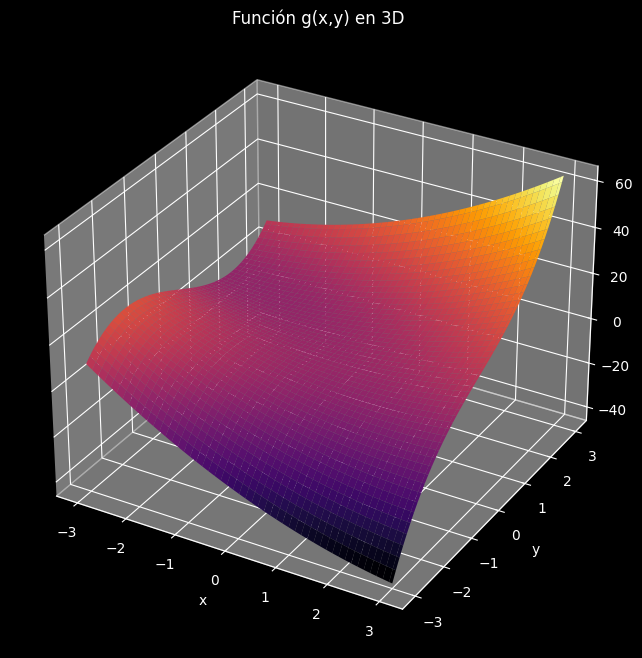

In [60]:
plt.style.use('dark_background')
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)
g_valores = g(x, y)

fig = plt.figure(figsize=(8, 8))  
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, g_valores, cmap='inferno')
ax.set_title('Función g(x,y) en 3D')
ax.set_xlabel('x')
ax.set_ylabel('y')


plt.show()

En la gráfica, se puede observar que en los puntos críticos mencionados hay un mínimo (aunque no tan claro). Una visualización mejor se puede realizar visualizando cada derivada parcial, más abajo. 

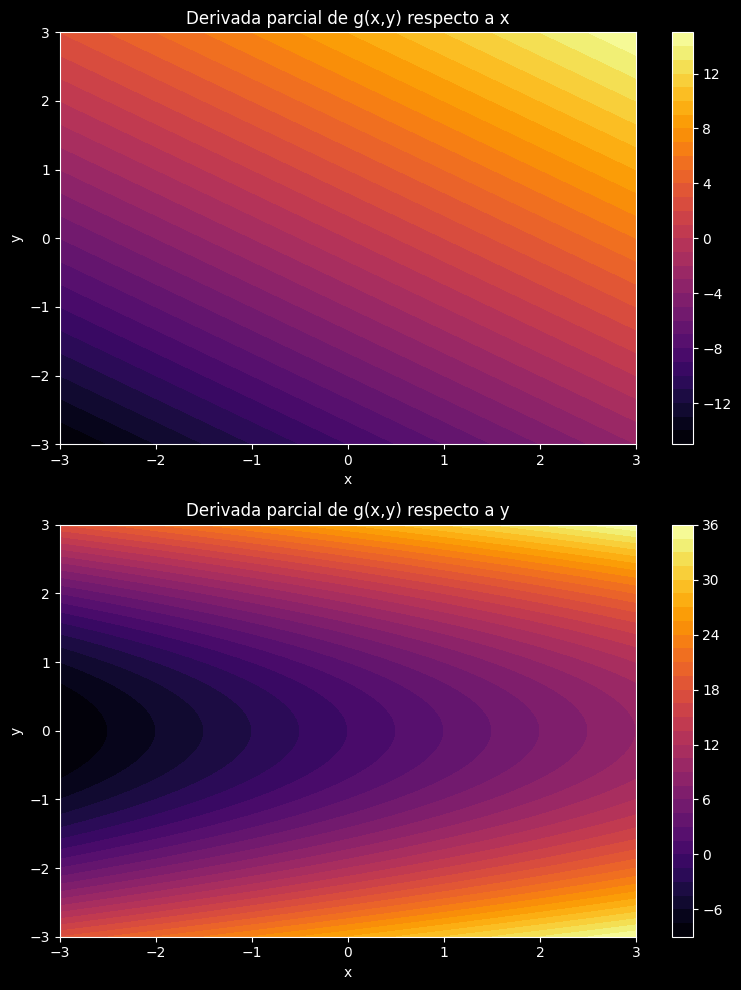

In [61]:
def parcial_x(x, y):
    return 2*x + 3*y

def parcial_y(x, y):
    return 3*x + 3*y**2

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)

valores_x = parcial_x(x, y)
valores_y = parcial_y(x, y)

fig, axs = plt.subplots(2, 1, figsize=(8, 10))

col = axs[0].contourf(x, y, valores_x, levels=30, cmap='inferno')
fig.colorbar(col, ax=axs[0])
axs[0].set_title('Derivada parcial de g(x,y) respecto a x')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

col = axs[1].contourf(x, y, valores_y, levels=30, cmap='inferno')
fig.colorbar(col, ax=axs[1])
axs[1].set_title('Derivada parcial de g(x,y) respecto a y')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')


plt.tight_layout()
plt.show()

En las dos gráficas anteriores se puede observar que los puntos $(-2.25, 1.5)$ y $(0,0)$ coinciden para ámbas derivadas parciales, ya que para ambos puntos $x$ e $y$, la derivada parcial es igual a cero. 

<br><br><br>
### **Comentarios de los alumnos**

Tanto el ejercicio 1 como el ejercicio 2 resultan entretenidos y se observa un progresión de conocimiento y un requerimiento de análisis continuo, que relaciona los apartados dentro de cada ejercicio entre sí. Es un trabajo entretenido e interesante de hacer, y la oportunidad de conocer a un compañero, coordinarse y luego entender lo que ha hecho cada uno es una también muy interesante. El trabajo de portafolio, es muy adecuado para la asignatura de Matemáticas aplicadas a la IA.